In [1]:
%matplotlib inline
import nltk
import pandas as pd
import seaborn as sns

## 1. Uploading and Exploring the Dataset

#### Data has been collected by RTV Noord and the RUG Faculty of Spatial Sciences. The data that will be used in this notebook was manually cleaned-- duplicates of columns or columns that contained option-identifiers (as opposed to the response) have been removed to make the data more usable. 

In [2]:
data = pd.read_csv('respondents_clean.csv', encoding = 'utf-8')
data.head()

,Respondent ID,Participatory Consent,Language,What is your gender?,What is your age?,What are the four numbers of your postal code?,How often do you cycle?,What is the most frequent purpose of your bicycle usage?,What type of bicycle do you use the most?,a normal bike,...,Sufficient separation between car lanes and bicycle lanes.,Sufficient lighting of bicycle lanes,An intersection design that takes into account cyclists,Well maintained bicycle lanes,"Low volume of motorized traffic, such as cars or scooters",Wide bicycle lanes,"On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?","On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?.1",Would you like to explain why you gave this rating? This is optional.,Unnamed: 24
0,2lr4y2sin6a9,True,nl,Male,45-64,9744,NaN,NaN,an e-bike,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,3ut3vfz4b9v6,True,nl,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2,4i6h6ksb8mwo,True,nl,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,9wcg4ig2tum3,True,nl,Female,25-44,9601,Daily (at least 5 times a week),Commuting: cycling as a means of transportatio...,an e-bike,False,...,True,True,False,False,False,False,NaN,NaN,NaN,NaN
4,7u9c48tyg2j8,True,en,Male,18-24,9472,Daily (at least 5 times a week),Commuting: cycling as a means of transportatio...,a normal bike,True,...,True,False,True,False,False,False,7.0,NaN,NaN,NaN


Based on the head of this dataset, it seems there are some incomplete or missing responses. 

In [3]:
#checking how many null responses are in each column
data.isna().sum()

Respondent ID                                                                                               0
Participatory Consent                                                                                       0
Language                                                                                                    0
What is your gender?                                                                                      662
What is your age?                                                                                         492
What are the four numbers of your postal code?                                                            573
How often do you cycle?                                                                                   960
What is the most frequent purpose of your bicycle usage?                                                  757
What type of bicycle do you use the most?                                                                 731
a normal b

Because this analysis will be based on gender differences, I will remove the rows that do not contain a response for gender. 

In [4]:
data.dropna(subset=['What is your gender?'], inplace=True)
data.head()

,Respondent ID,Participatory Consent,Language,What is your gender?,What is your age?,What are the four numbers of your postal code?,How often do you cycle?,What is the most frequent purpose of your bicycle usage?,What type of bicycle do you use the most?,a normal bike,...,Sufficient separation between car lanes and bicycle lanes.,Sufficient lighting of bicycle lanes,An intersection design that takes into account cyclists,Well maintained bicycle lanes,"Low volume of motorized traffic, such as cars or scooters",Wide bicycle lanes,"On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?","On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?.1",Would you like to explain why you gave this rating? This is optional.,Unnamed: 24
0,2lr4y2sin6a9,True,nl,Male,45-64,9744,NaN,NaN,an e-bike,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
3,9wcg4ig2tum3,True,nl,Female,25-44,9601,Daily (at least 5 times a week),Commuting: cycling as a means of transportatio...,an e-bike,False,...,True,True,False,False,False,False,NaN,NaN,NaN,NaN
4,7u9c48tyg2j8,True,en,Male,18-24,9472,Daily (at least 5 times a week),Commuting: cycling as a means of transportatio...,a normal bike,True,...,True,False,True,False,False,False,7.0,NaN,NaN,NaN
5,3498joo7wjx8,True,nl,Female,45-64,9939,Often (3-4 a week),"Recreation: cycling for enjoyment, exercise, o...",an e-bike,False,...,True,False,True,False,False,False,4.0,5,NaN,NaN
6,7eg28mt44nb3,True,nl,Male,45-64,9933,Often (3-4 a week),"Utility: cycling for errands, shopping, or oth...",a normal bike,True,...,True,False,False,False,False,True,NaN,NaN,NaN,NaN


In [5]:
#checking again how many null responses are in each column after dropping
data.isna().sum()

Respondent ID                                                                                               0
Participatory Consent                                                                                       0
Language                                                                                                    0
What is your gender?                                                                                        0
What is your age?                                                                                           9
What are the four numbers of your postal code?                                                             85
How often do you cycle?                                                                                   428
What is the most frequent purpose of your bicycle usage?                                                  233
What type of bicycle do you use the most?                                                                 216
a normal b

In [6]:
use = data['What is the most frequent purpose of your bicycle usage?']

use.unique()

array([nan,
       'Commuting: cycling as a means of transportation to and from work or school',
       'Recreation: cycling for enjoyment, exercise, or sport',
       'Utility: cycling for errands, shopping, or other practical purposes',
       'Cycling to other destinations'], dtype=object)

In [7]:
#changing the responses to be shorter and more readable 
data.loc[data['What is the most frequent purpose of your bicycle usage?'] == 'Commuting: cycling as a means of transportation to and from work or school', 'What is the most frequent purpose of your bicycle usage?'] = 'Commuting'
data.loc[data['What is the most frequent purpose of your bicycle usage?'] == 'Recreation: cycling for enjoyment, exercise, or sport', 'What is the most frequent purpose of your bicycle usage?'] = 'Recreation'
data.loc[data['What is the most frequent purpose of your bicycle usage?'] == 'Utility: cycling for errands, shopping, or other practical purposes', 'What is the most frequent purpose of your bicycle usage?'] = 'Utility'

### Now, lets have a brief look at the data distributions. 

In [39]:
#defining a few variables from our data to be plotted
type_bike= data['What type of bicycle do you use the most?']
gender = data['What is your gender?']
safety = data['On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?']
age = data['What is your age?']
use = data['What is the most frequent purpose of your bicycle usage?']

#creating data frames that only contain the responses from each respective gender
men = data[data['What is your gender?'] == 'Male']
women = data[data['What is your gender?']== 'Female']
other_gender = data[data['What is your gender?'] == 'Other']

##### How many of each gender responded to the survey?

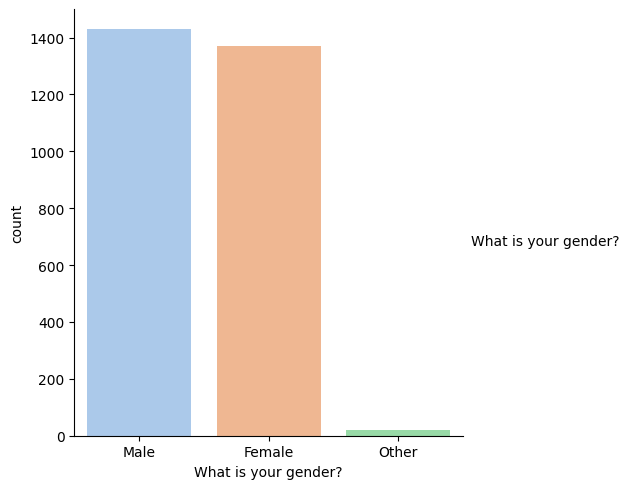

In [9]:
sns.catplot(x=gender, kind="count", hue = gender, palette="pastel")

In [40]:
len(men)

1429

In [41]:
len(women)

1372

In [42]:
len(other_gender)

21

#### There is a pretty even distribution of men and women (1429 and 1372 respectively, but only 21 people who had anohter gender responded

#### Let's see how many e-bikers versus normal bike users answered the survey. 

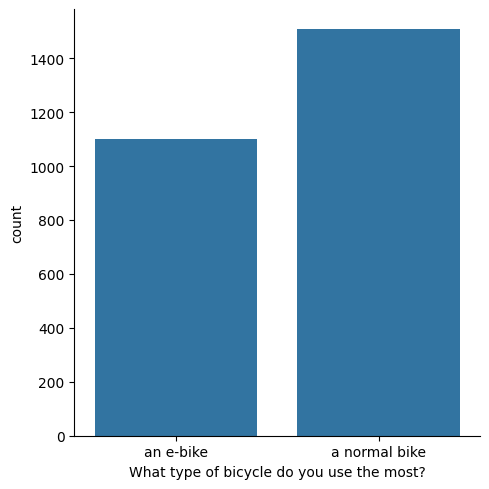

In [49]:
sns.catplot(x=type_bike, kind="count")

In [48]:
type_bike.isna().sum()

216

Based on this plot, it seems that men and women are relatively evenly distributed, with a very small amount of other genders. However, there are more men that answered the survey then women. Additionally, around 2/3 of the respondents ride a normal bike whereas the other ride an e-bike. 

### Now, lets have a preliminary look at the distribution of bicycle safety scores given to the province of Groningen

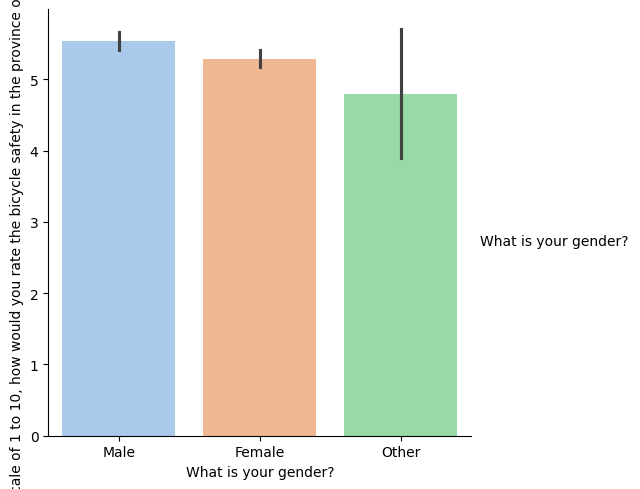

In [11]:
sns.catplot(x=gender, y=safety, kind="bar", hue = gender, palette = 'pastel')

Overall, men rated the bicycle safety than women, but with a small margin. The average safety score given by men would be aroun 5.5 and for women would be 5.25. However, other gender people rated the bicycle safety lower at under 5, but with a larger margin of error.

#### However, there are also different age groups represented in the survey. 

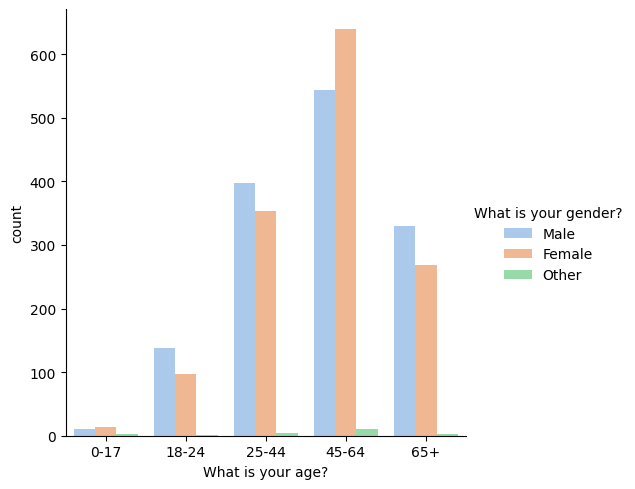

In [12]:
sns.catplot(x=age, kind="count", hue = gender, palette="pastel", order=['0-17','18-24','25-44', '45-64', '65+'])

Based on this data, the majority of respondents are between 45 to 64 years old. The distribution of ages skews older as there are very few respondents who are between 18 adn 24, and even less who are 17 and under. 

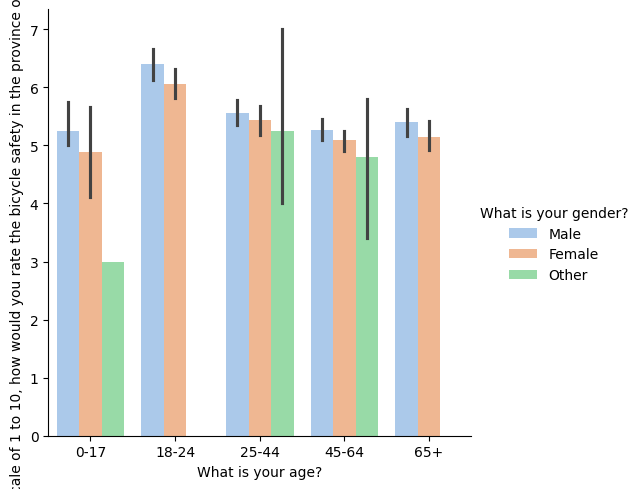

In [13]:
sns.catplot(x=age, y=safety, kind="bar", hue = gender, palette = 'pastel', order=['0-17','18-24','25-44', '45-64', '65+'])

In every age group, the men on average scored the safety of bicycling in Groningen the highest out of all the genders. Addiitonally, for age groups where people of other genders were represented, they had the lowest average score, but with the most variation. 

#### Let's look at the distribution of preliminary bicycle usage, first based on gender, then on type of bike

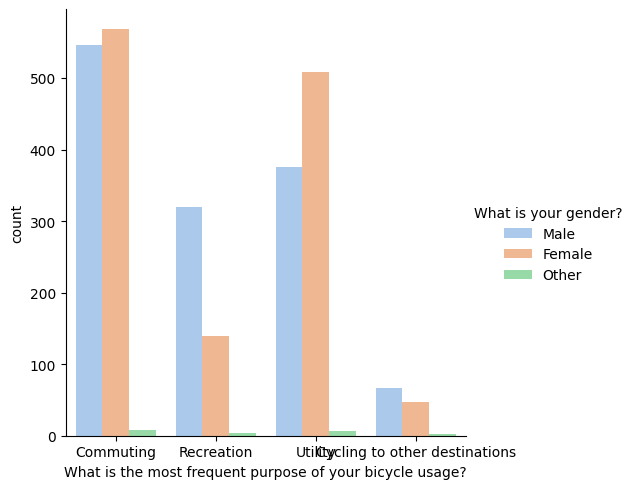

In [14]:
sns.catplot(x=use, kind="count", hue = gender, palette="pastel")

Based on this, it seems that men and women use bicycles for different purposes. While about a similar number of men and women (around 550 each) use their bicycle for commuting purposes, for those who do not, men are more likely to use their bicycle for recreation while women use the bicycle more for utility purposes. 

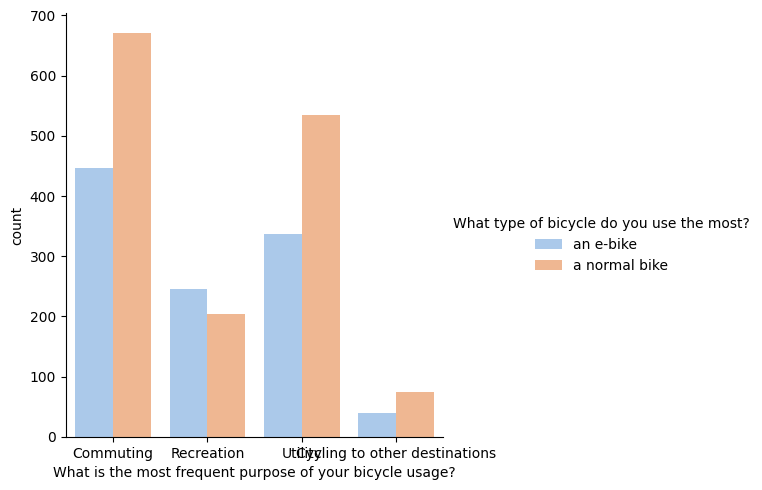

In [15]:
sns.catplot(x=use, kind="count", hue = type_bike, palette="pastel")

#### Let's see if usage of bike influences the safety scores.

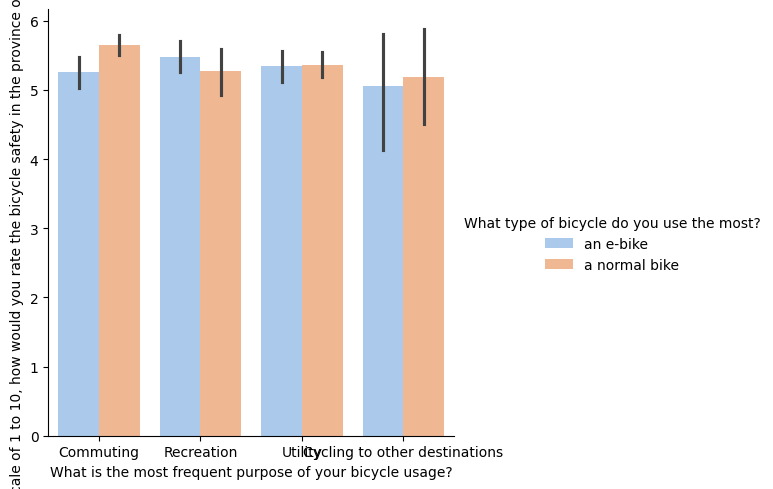

In [52]:
sns.catplot(x=use, y=safety, kind = 'bar', hue = type_bike, palette="pastel")

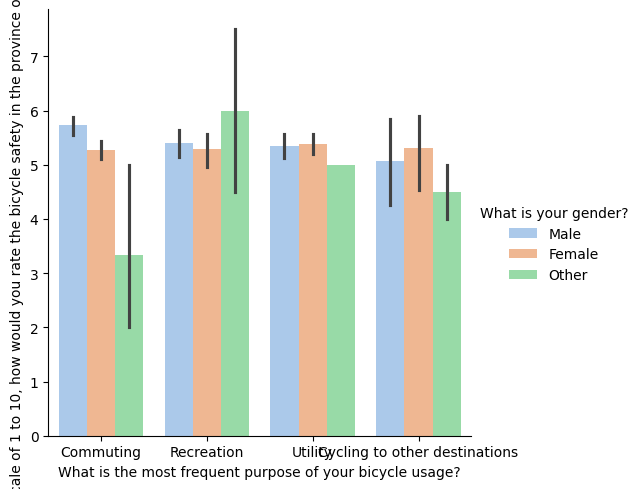

In [55]:
sns.catplot(x=use, y=safety, kind = 'bar', hue = gender, palette="pastel")

#### In addition to this demographic information, respondents also chose different factors that are important to their feelings of safety. 

In this survey, participants were asked about to choose max two out of six different factors that are most important for safe cycling locations: 

- Sufficient separation between car lanes and bicycle lanes.                                                  
- Sufficient lighting of bicycle lanes                                                                        
- An intersection design that takes into account cyclists                                                     
- Well maintained bicycle lanes                                                                               
- Low volume of motorized traffic, such as cars or scooters                                                   
- Wide bicycle lanes                              

In this case, true is stored as the integer 1, where false is the integer 0. 


Here, I subset the dataframe into responses who chose each resepctive factor as at least one of the factors that are most important for safe cycling locations.

In [16]:
separation = data[data['Sufficient separation between car lanes and bicycle lanes.'] == 1]
print(len(separation))

804


In [17]:
sufficient_light = data[data['Sufficient lighting of bicycle lanes'] == 1]
print(len(sufficient_light))

198


In [18]:
intersection_design = data[data['An intersection design that takes into account cyclists'] == 1]
print(len(intersection_design))

711


In [19]:
maintained_lanes = data[data['Well maintained bicycle lanes'] == 1]
print(len(maintained_lanes))

263


In [20]:
low_motor = data[data['Low volume of motorized traffic, such as cars or scooters'] == 1]
print(len(low_motor))

222


In [21]:
wide_lanes = data[data['Wide bicycle lanes'] == 1]
print(len(wide_lanes))

343


Based on the length of each dataframe, it seems that sufficient separation between car and bicycle lanes (804 respondents) as well as intersections that take into account cyclists (711 respondents) are the two most important factors. The other four factors are chosen significantly less, with wide lanes recieving 343 indications, maintained bicycle lanes having 263 responses, and low volume of motorized vehicles having 222 responses. The least chosen factor is the sufficient lighting of bicycle lanes, with only 198 indications. 

#### Now, lets take a look at the distribution of the respondents

In [22]:
type_bike= separation['What type of bicycle do you use the most?']
gender = separation['What is your gender?']
safety = separation['On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?']
age = separation['What is your age?']
use = separation['What is the most frequent purpose of your bicycle usage?']

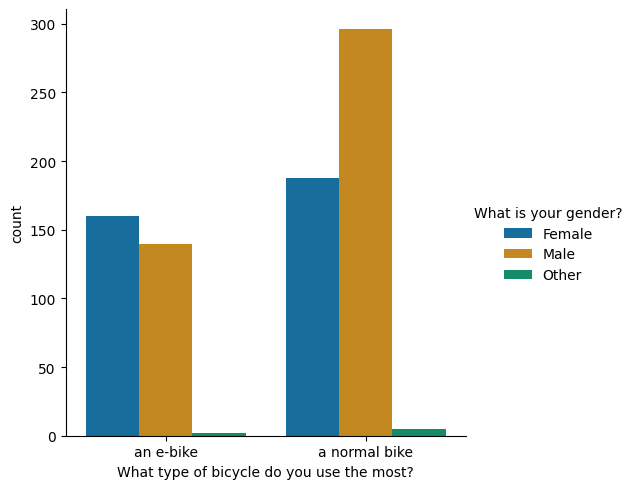

In [23]:
sns.catplot(x=type_bike, kind="count", hue = gender, palette="colorblind")

Based on this graph, it seems that men riding normal bikes find separation of bike lanes very important, and those riding normal bikes on average are more likely to respond that it is important

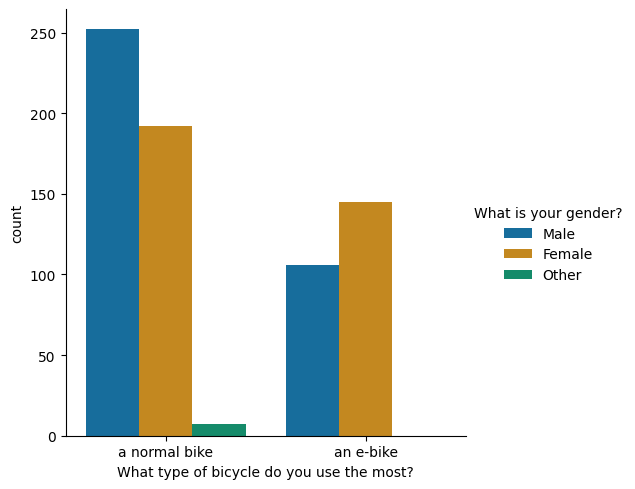

In [24]:
type_bike= intersection_design['What type of bicycle do you use the most?']
gender = intersection_design['What is your gender?']
safety = intersection_design['On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?']
age = intersection_design['What is your age?']
use = intersection_design['What is the most frequent purpose of your bicycle usage?']

sns.catplot(x=type_bike, kind="count", hue = gender, palette="colorblind")

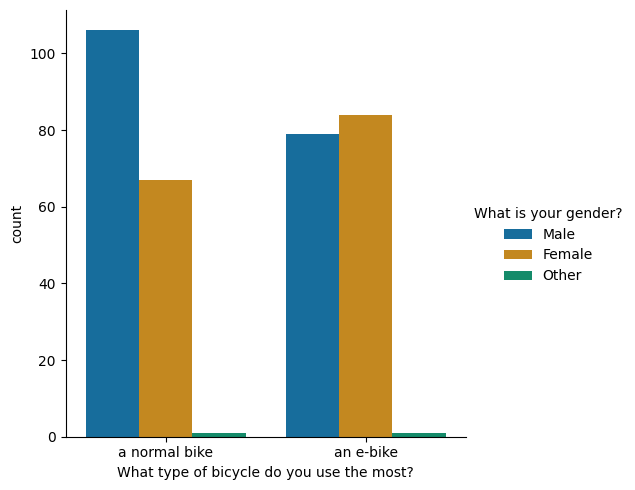

In [25]:
type_bike= wide_lanes['What type of bicycle do you use the most?']
gender = wide_lanes['What is your gender?']
safety = wide_lanes['On a scale of 1 to 10, how would you rate the bicycle safety in the province of Groningen?']
age = wide_lanes['What is your age?']
use = wide_lanes['What is the most frequent purpose of your bicycle usage?']
sns.catplot(x=type_bike, kind="count", hue = gender, palette="colorblind")

### However, finding just the counts could be potentially misleading as there is an unequal distribution of men and women in addition to ebike and normal bike users. 

In [26]:

def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

In [27]:
#define data
data_list = pd.Series(data['What type of bicycle do you use the most?']).tolist()

#calculate relative frequencies for each value in list
rel_freq_type_bike = rel_freq(data_list)

In [30]:
rel_freq_type_bike

[('a normal bike', 0.5340184266477676),
 ('an e-bike', 0.3894401133947555),
 (nan, 0.07654145995747696)]

In [29]:
#define data
data_list = pd.Series(data['What is your gender?']).tolist()

#calculate relative frequencies for each value in list
rel_freq_gender = rel_freq(data_list)

rel_freq_gender

[('Female', 0.4861800141743444),
 ('Other', 0.0074415308291991495),
 ('Male', 0.5063784549964564)]